# **SHOPPING TRENDS**

**About Dataset**

Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

Content:
The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

Dataset Glossary (Column-wise)

Customer ID:A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

Age: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

Gender: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

Item Purchased: The specific product or item selected by the customer during the transaction.

Category: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

Purchase Amount (USD): The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

Location: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

Size: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

Color: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

Season: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

Review Rating: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

Subscription Status: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

Shipping Type: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

Discount Applied: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

Promo Code Used: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

Previous Purchases: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

Payment Method: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

Frequency of Purchases: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.ticker as mtick


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Portafolio/PYTHON/Bases/shopping_behavior_updated.csv')
datos

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## **Limpieza y exploración inicial de los datos**

Revisión de la base de datos y conversión / eliminación / imputación de información

*   Datos/registros duplicados
*   Datos con formatos inconsistentes
*   Datos nulos o faltantes
*   Tipo de datos
*   Cantidad de registros
*   Registros unicos
*   Nombres de las columnas
*   Cantidad de columnas



In [ ]:
# nombres de las columnas
datos.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
# Tipos y cantidad de datos / Cantidad de registros en total
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# principales datos descriptivos de la base
datos.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# los nulls de cada columna
datos.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
# cantidad de clientes / verificar si hay duplicados
conteo_id_unicos = datos['Customer ID'].nunique()
conteo_id_unicos

3900

In [ ]:
# cantidad de clientes por genero
datos['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

## **Análisis de la situación**


*   Ventas por categoria, localidad, genero, estación, etc. Observar el comportamiento de las ventas por cada atributo en particular.
*   Visualizaciones sencillas y claras de las tendencias de compra de los consumidores.



### Comportamiento de las ventas

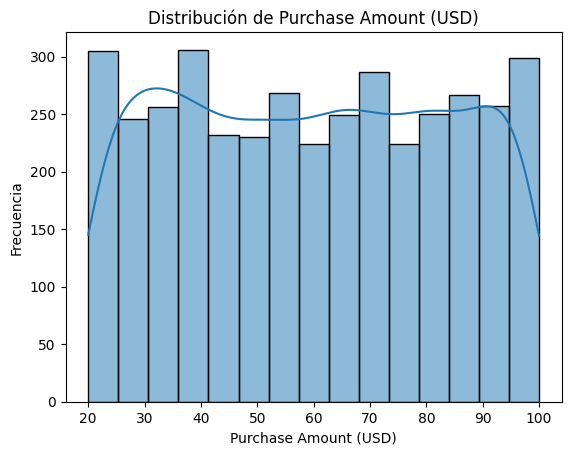

In [ ]:
sns.histplot(datos["Purchase Amount (USD)"], kde=True)

# Opcionalmente, puedes añadir etiquetas y un título al gráfico
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Purchase Amount (USD)")

# Muestra el gráfico
plt.show()

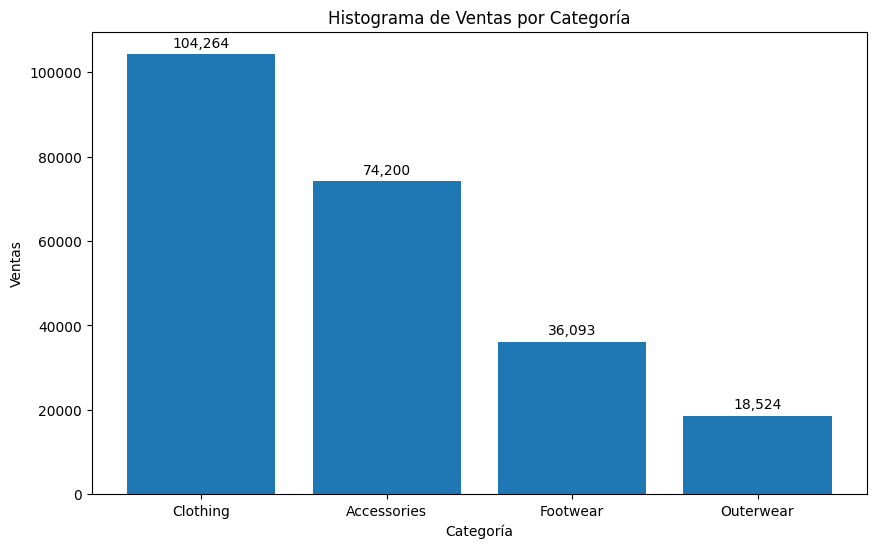

In [ ]:
# Observar el comportamiento de las ventas por categoria
# Agrupa los datos por categoría y suma las ventas
ventas_por_categoria = datos.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Purchase Amount (USD)', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Category'], ventas_por_categoria['Purchase Amount (USD)'])
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.title('Histograma de Ventas por Categoría')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

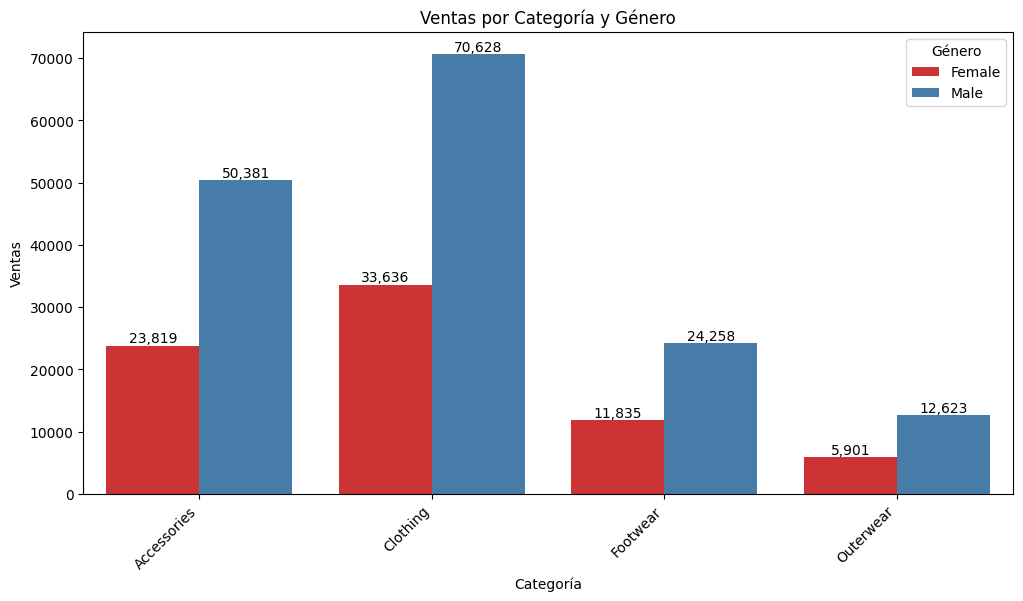

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa los datos por categoría y género y suma las ventas
ventas_por_categoria_genero = datos.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum().reset_index()

# Crea un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")  # Elige una paleta de colores
ax = sns.barplot(data=ventas_por_categoria_genero, x='Category', y='Purchase Amount (USD)', hue='Gender')

plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.title('Ventas por Categoría y Género')
plt.legend(title='Género')

# Agregar etiquetas de datos con puntos de mil
for p in ax.patches:
    height = p.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    ax.annotate(label, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()



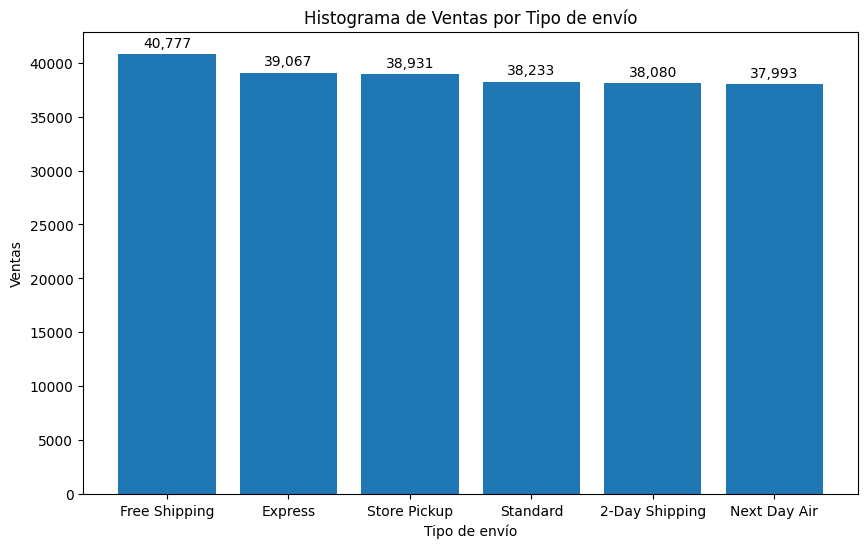

In [ ]:
# ventas por tipo de envio
# Agrupa los datos por categoría y suma las ventas
ventas_por_categoria = datos.groupby('Shipping Type')['Purchase Amount (USD)'].sum().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Purchase Amount (USD)', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Shipping Type'], ventas_por_categoria['Purchase Amount (USD)'])
plt.xlabel('Tipo de envío')
plt.ylabel('Ventas')
plt.title('Histograma de Ventas por Tipo de envío')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

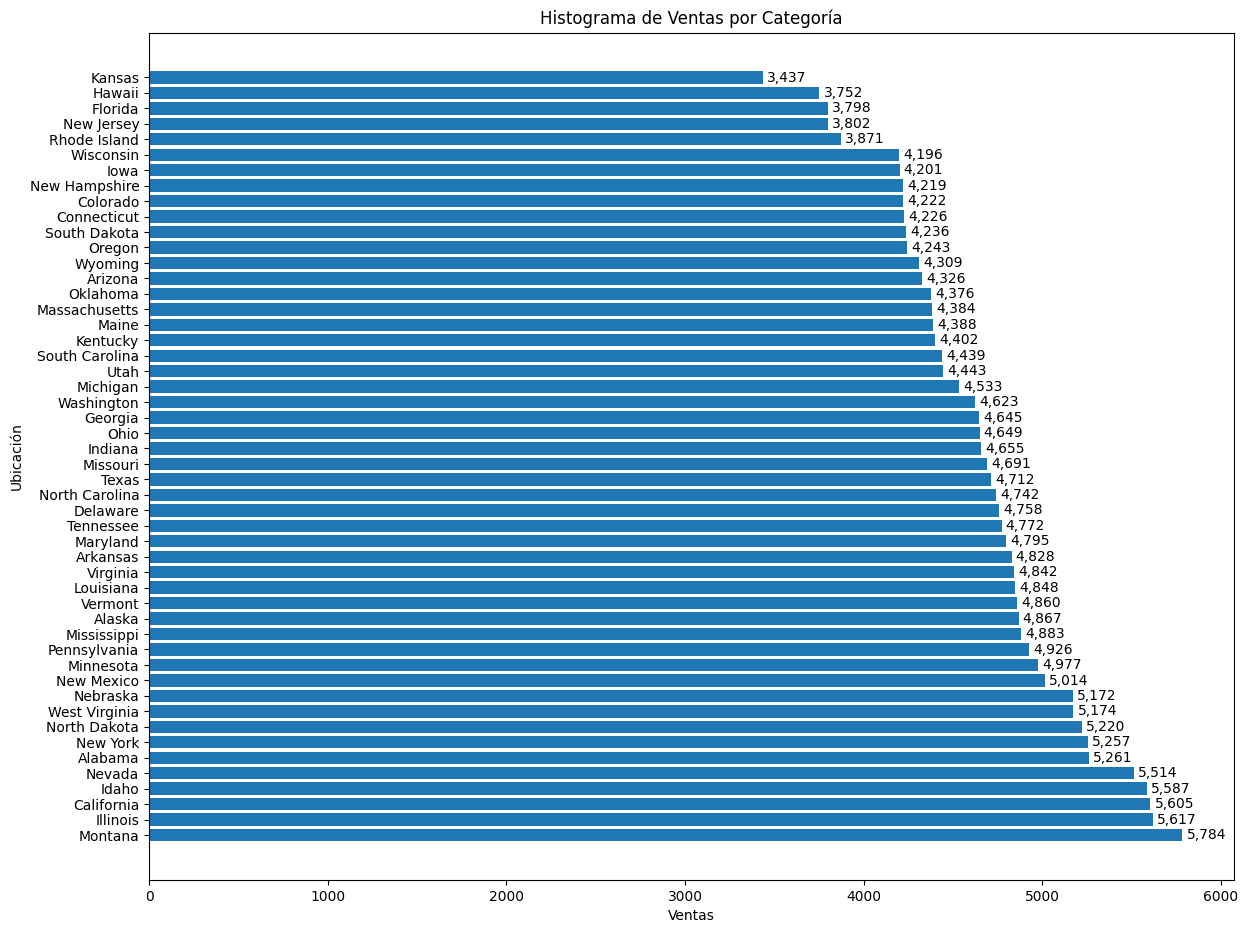

In [ ]:
# Observar el comportamiento de las ventas por localidad
# Agrupa los datos por categoría y suma las ventas
ventas_por_ubi = datos.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_ubi = ventas_por_ubi.sort_values(by='Purchase Amount (USD)', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(14, 11))
bars = plt.barh(ventas_por_ubi['Location'], ventas_por_ubi['Purchase Amount (USD)'])  # Usamos barh para gráfico horizontal
plt.ylabel('Ubicación')
plt.xlabel('Ventas')
plt.title('Histograma de Ventas por Categoría')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    width = bar.get_width()
    label = "{:,.0f}".format(width)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0), textcoords='offset points',
                 ha='left', va='center')

plt.show()

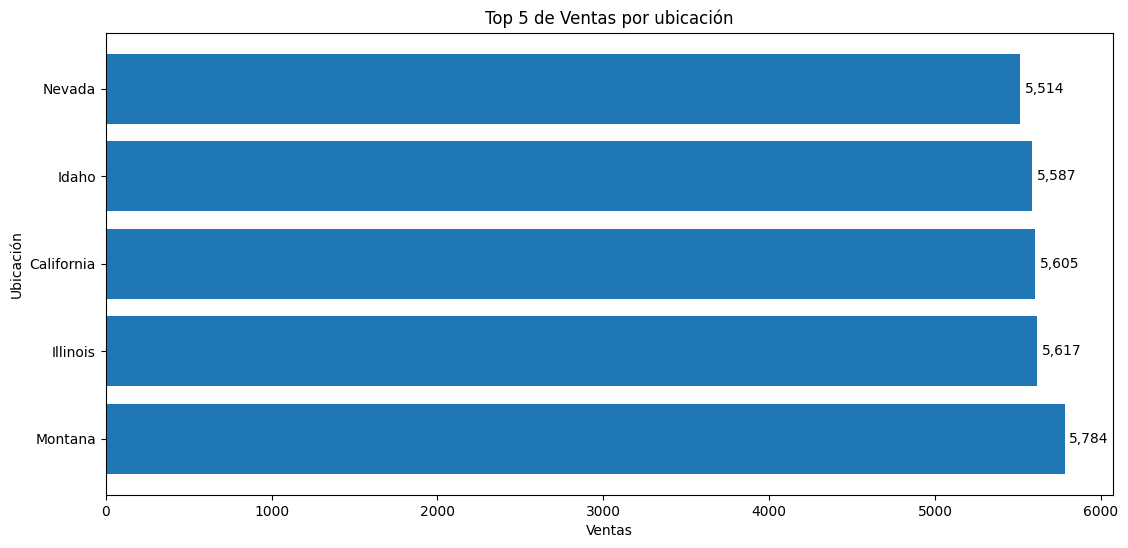

In [ ]:
# Top 5 de las ubicaciones con más ventas
# Agrupa los datos por categoría y suma las ventas
ventas_por_ubi = datos.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_ubi = ventas_por_ubi.sort_values(by='Purchase Amount (USD)', ascending=False)
ventas_por_ubi = ventas_por_ubi.head(5)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(13, 6))
bars = plt.barh(ventas_por_ubi['Location'], ventas_por_ubi['Purchase Amount (USD)'])  # Usamos barh para gráfico horizontal
plt.ylabel('Ubicación')
plt.xlabel('Ventas')
plt.title('Top 5 de Ventas por ubicación')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    width = bar.get_width()
    label = "{:,.0f}".format(width)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0), textcoords='offset points',
                 ha='left', va='center')

plt.show()

In [ ]:
# total de ventas
datos['Purchase Amount (USD)'].sum()

233081

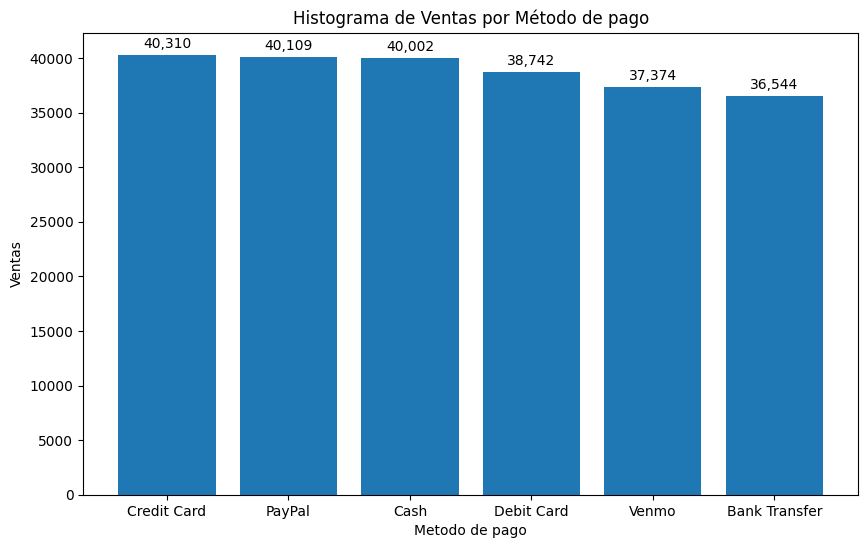

In [ ]:
# Observar el comportamiento de las ventas por tipo de pago
# Agrupa los datos por categoría y suma las ventas
ventas_por_categoria = datos.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Purchase Amount (USD)', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Payment Method'], ventas_por_categoria['Purchase Amount (USD)'])
plt.xlabel('Metodo de pago')
plt.ylabel('Ventas')
plt.title('Histograma de Ventas por Método de pago')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

In [ ]:
# ventas por género
fig = px.pie(values = datos['Purchase Amount (USD)'],
             names = datos['Gender'],
             color = datos['Gender'],
             hole = 0.4, color_discrete_sequence=['darkblue', 'lightblue'])

fig.show()

In [ ]:

fig = px.pie(values=datos['Purchase Amount (USD)'],
             names=datos['Season'],
             color=datos['Season'],
             hole=0.4,
             color_discrete_sequence=['darkblue', 'lightblue', 'deepskyblue', 'dodgerblue'])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title_text='Season')
fig.show()


*    El segmento que más compras reporta es el de Clothing, y el que menor valor genera en esta variable es outerwear (chaquetas, abrigos, sweaters) proporción que es entendida ya que los clientes demuestra que estan en los Estados Unidos por ende estan sujetos a las estaciones y outerwear son prendas temporales (inverno) así que suelen ser usada en menor frecuencia y por ende son menos requeridas.

*    La mayoría de los clientes opta por el envío gratuito y el express, aunque, en compración con los otros tipos de despachos no existe una diferencia significativa.

*     Los estados con mayores compras generadas son Montana, Illinois y California y tienen como método de pago preferido la tarjeta de credito y PayPal.

*    La mayoría de los compradores son hombres representando más de la mitad de la totalidad de clientes activos.

*    La temporada en la que compran en menor cantidad es verano con un 24%.

### Correlaciones entre las variables



*   Las variables del dataset presentan algún tipo de correlación?
*   Enlistar cuales son las variables con correlaciones negativas o positivas
*   Conversión de variables categoricas a numericas para comprobar si agregando nuevas variables a la correlación se presentan cambios





In [ ]:
# matriz de correlación. Existe algún tipo de correlación en las variables proporcionadas.
# Cuanto más cercano esté el valor a -1 o 1, más fuerte será la correlación. Los valores cercanos a 0 indican una correlación débil.
correlation_matrix = datos.corr()
correlation_matrix

<ipython-input-16-0a37c962e534>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


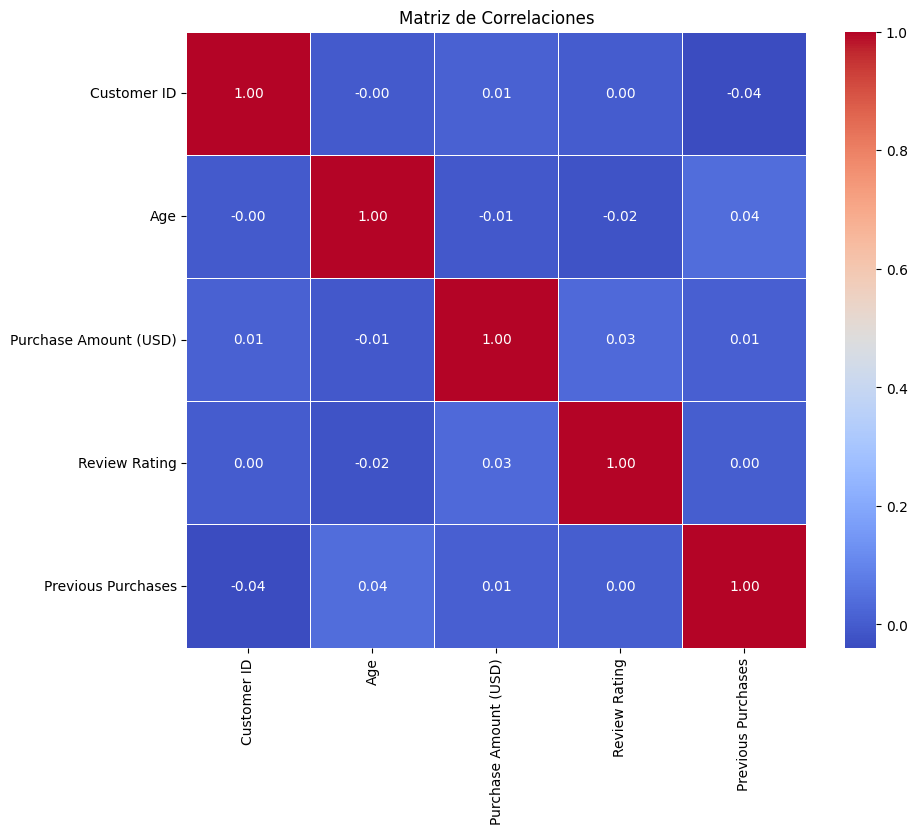

In [ ]:
# grafico de la matriz
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

# Muestra el gráfico
plt.show()

In [ ]:
# Si se agregan otras variables como el género, Subscription Status, Discount Applied	y Promo Code Used puede existir alguna correlación fuerte?
# Aplicar get_dummies para convertir el género, Subscription Status, Discount Applied	y Promo Code Used en dummy
datos_dummies = pd.get_dummies(datos, columns=['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used'], prefix=['Gen', 'Sub','Dis','Pro'])
datos_dummies.head(3)

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Payment Method,Frequency of Purchases,Gen_Female,Gen_Male,Sub_No,Sub_Yes,Dis_No,Dis_Yes,Pro_No,Pro_Yes
0,1,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,Venmo,Fortnightly,0,1,0,1,0,1,0,1
1,2,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,Cash,Fortnightly,0,1,0,1,0,1,0,1
2,3,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,Credit Card,Weekly,0,1,0,1,0,1,0,1


<ipython-input-19-dce86bedbdda>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



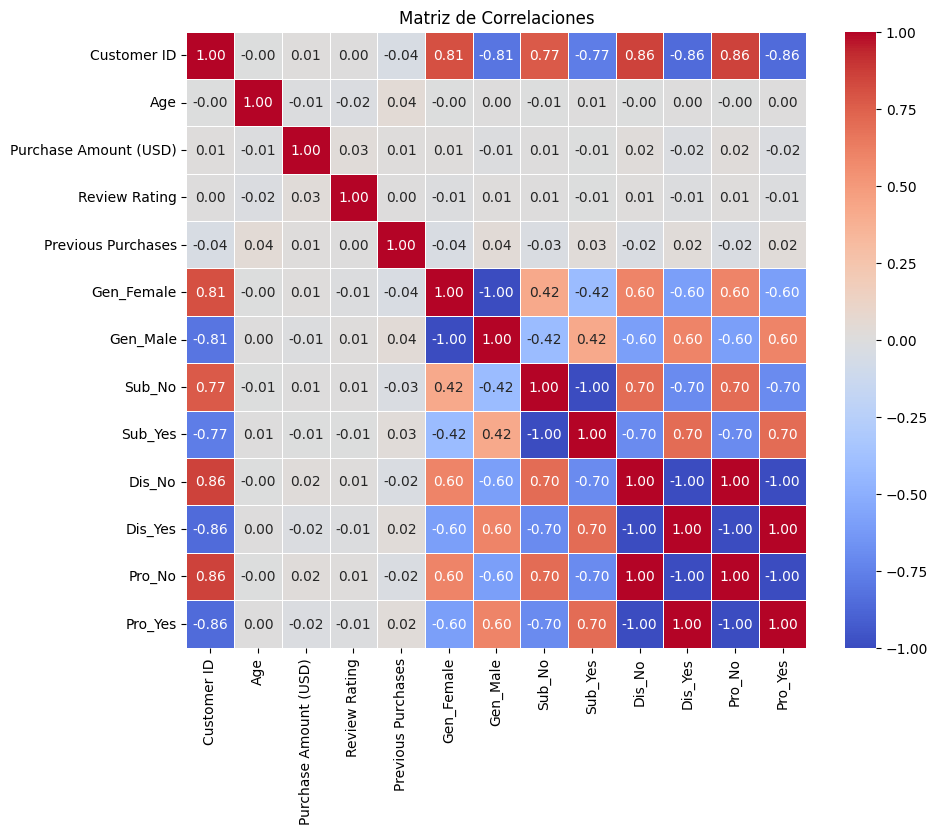

In [ ]:
# matriz con las variables convertidas
correlation_matrix = datos_dummies.corr()

plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

plt.show()

In [ ]:
datos['Subscription Status'].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

Al convertir las variables (gender, Subscription Status, Discount Applied	y Promo Code Used) en numericas, se puede observar que en comparación con la primera matriz si se presentan correlaciones significativas:

*   **Género**

Gender vs suscription status

Esta variable reporta una correlación de (No suscripción) 0,42 y (Si suscripción) -0,42 con Subscription Status, indicando que al aumentar la cantidad de clientes identificadas mujeres disminuye las suscripciones, esto se puede relacionar con el hecho de que a pesar de que hay mujeres dentro de los registros de compras, estas solo corresponden al 30% vs hombres que poseen el 70%, asi mismo los hombres tendrán un comportamiento inverso, mientras más hombres registrados se reportan mayor aumento en suscripciones. Esto indica que la ganancia, la lealtad y la importancia en los clientes este enfocada primordialmente en hombres.

Gender vs discounts

En la parte de los descuentos aplicados a los clientes, el comportamiento como es de esperarse en las mujeres es una correlación negativa, en la cual a pesar de generarse descuentos las mujeres no reciben este beneficio o no compran bajo estas condiciones, por ende, los descuentos estan sujetos nuevamente a la participación de los hombres por lo que es mas probable que los hombres sean quienes compren en las promociones validas.

Gender vs code promo

Las mujeres son quienes en mayor probabilidad menos codigos promocionales manejen con una correlación de -0.60 en sub_yes (mayor presencia de mujeres menor son las cantidades de códigos generados dentro del sistema de compras), en los hombres el comportamiento es a la inversa con una correlación positiva de 0.60 en sub_no.


En customerID vs las otras 3 variables convertidas presenta una correlación, sin embargo, comprendiendo el entendimiento del negocio y sabiendo que la variable de customerID son registros unicos los cuales como atributo a analizar no cumplen con orden y magnitud.



In [ ]:
# revisión de cantidad de mujeres vs hombres en suscripciones
gender_por_subs = datos.groupby('Gender')['Subscription Status'].value_counts()
gender_por_subs


Gender  Subscription Status
Female  No                     1248
Male    No                     1599
        Yes                    1053
Name: Subscription Status, dtype: int64

In [ ]:
# revisión de cantidad de mujeres vs hombres en codigos promocionales
gender_por_subs = datos.groupby('Gender')['Promo Code Used'].value_counts()
gender_por_subs

Gender  Promo Code Used
Female  No                 1248
Male    Yes                1677
        No                  975
Name: Promo Code Used, dtype: int64

In [ ]:
# revisión de cantidad de mujeres vs hombres en descuentos aplicados en compras
gender_por_disc = datos.groupby('Gender')['Discount Applied'].value_counts()
gender_por_disc

Gender  Discount Applied
Female  No                  1248
Male    Yes                 1677
        No                   975
Name: Discount Applied, dtype: int64

### **Consumidores / cliente promedio**

In [ ]:
# edad promedio de los clientes
datos['Age'].mean()

44.06846153846154

In [ ]:
# precio promedio de compra realizada
datos['Purchase Amount (USD)'].mean()

59.76435897435898

In [ ]:
# promedio de puntuacion brindada
datos['Review Rating'].mean()

3.7499487179487176

In [ ]:
# medida compradas por clientes
datos['Size'].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

In [ ]:
# compras anteriores por clientes
purchase_clients = datos.groupby('Customer ID')['Previous Purchases'].sum()

# clientes por la cantidad de compras previas en orden descendente
purchase_clients = purchase_clients.sort_values(ascending=False)

# 10 primeros clientes con más compras previas
top_10_purchase_clients = purchase_clients.head(10)

print(top_10_purchase_clients)

Customer ID
3262    50
634     50
2263    50
2265    50
125     50
666     50
3582    50
2100    50
314     50
3206    50
Name: Previous Purchases, dtype: int64


In [ ]:
# cantidad de colores de clientes
datos['Color'].value_counts()

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

In [ ]:
# Cantidad de tipo de productos comprados
datos['Item Purchased'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

*    El cliente promedio de esta tienda ronda los 44 años en su mayoría género
masculino con promedio de compras de 60 USD y puntuaciones de 3,75.
*    El top de los clientes con compras anteriores es de 50, clientes estrella como 3262, 634, 2263 y 2265.
*    La talla más solicitada por los consumidores es Medium.
*    El producto más comprado es la blusa, joyería y pants. El color más repetido entre los clientes es el oliva preferido por 177 clientes y el amarillo por 174.

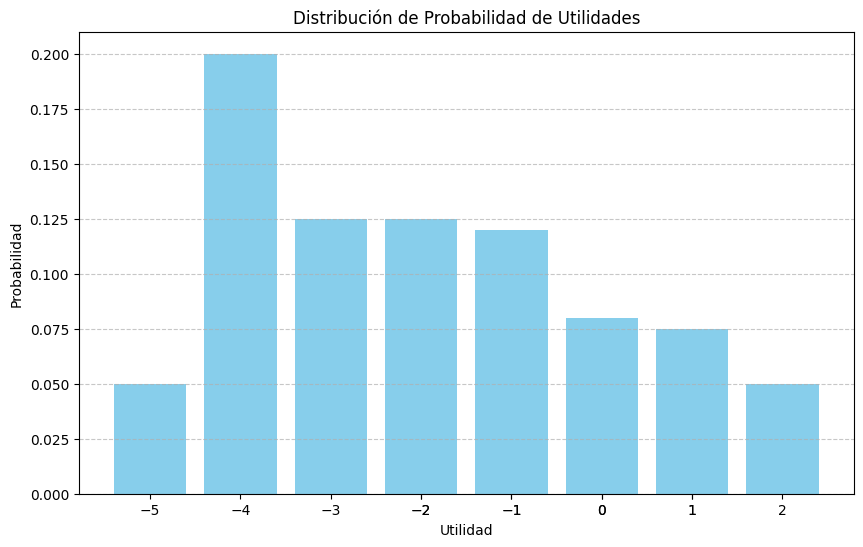

In [6]:
import matplotlib.pyplot as plt

# Utilidades y probabilidades asociadas
utilidades = [-5.000,-4.000,-3.000,-2.000,-2.000,-1.000,-1.000,0,0,1.000,1.000,2.000]
probabilidades = [0.05,0.2,0.125,0.03,0.125,0.02,0.12,0.08,0.075,0.05,0.075,0.05]

# Graficar la distribución de probabilidad de las utilidades
plt.figure(figsize=(10, 6))
plt.bar(utilidades, probabilidades, color='skyblue')
plt.xlabel('Utilidad')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidad de Utilidades')
plt.xticks(utilidades)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [55]:
# Definir las utilidades y probabilidades
utilidades = [-5000,-4000,-3000,-2000,-2000,-1000,-1000,0,0,1000,1000,2000]
probabilidades = [0.05,0.2,0.125,0.03,0.125,0.02,0.12,0.08,0.075,0.05,0.075,0.05]


# Calcular métricas corregidas
valor_esperado = np.sum(np.multiply(utilidades, probabilidades))
desviacion_estandar = np.sqrt(np.sum(np.multiply(np.power(np.subtract(utilidades, valor_esperado), 2), probabilidades)))
var_5_percentil = np.percentile(utilidades, 5)

print("Valor Esperado (E[U]):", valor_esperado)
print("Desviación Estándar:", desviacion_estandar)
print("VaR al 5%:", var_5_percentil)


Valor Esperado (E[U]): -1650.0
Desviación Estándar: 1984.3134832984429
VaR al 5%: -4450.0


In [56]:
import numpy as np
import pandas as pd

# Definir los rangos de ingresos y costos
ingresos_rangos = [0, 1000, 2000, 3000]
costos_rangos = [1000, 2000, 5000]

# Número de muestras
n_muestras = 100

# Generar probabilidades aleatorias para ingresos y costos
probabilidades_ingresos = np.random.rand(n_muestras)
probabilidades_costos = np.random.rand(n_muestras)

# Calcular ingresos y costos correspondientes a las probabilidades
ingresos = np.zeros(n_muestras)
costos = np.zeros(n_muestras)

for i in range(n_muestras):
    if probabilidades_ingresos[i] <= 0.25:
        ingresos[i] = 3000
    elif probabilidades_ingresos[i] <= 0.5:
        ingresos[i] = 2000
    elif probabilidades_ingresos[i] <= 0.9:
        ingresos[i] = 1000

    if probabilidades_costos[i] <= 0.2:
        costos[i] = 1000
    elif probabilidades_costos[i] <= 0.5:
        costos[i] = 2000
    else:
        costos[i] = 5000

# Calcular las probabilidades de utilidad como el producto de las probabilidades de ingresos y costos
probabilidades_utilidad = probabilidades_ingresos * probabilidades_costos

# Calcular la utilidad como la resta de ingresos y costos
utilidades = ingresos - costos

# Crear DataFrame
data = {'probabilidades_ingresos': probabilidades_ingresos,
        'ingresos': ingresos,
        'probabilidades_costos': probabilidades_costos,
        'costos': costos,
        'probabilidades_utilidad': probabilidades_utilidad,
        'utilidades': utilidades}

df = pd.DataFrame(data)

print(df)

# Calcular métricas
valor_esperado = np.sum(np.multiply(utilidades, probabilidades_utilidad))
desviacion_estandar = np.sqrt(np.sum(np.multiply(np.power(np.subtract(utilidades, valor_esperado), 2), probabilidades_utilidad)))
var_5_percentil = np.percentile(utilidades, 5)

print("Valor Esperado:", valor_esperado)
print("Desviación Estándar:", desviacion_estandar)
print("VaR al 5%:", var_5_percentil)


    probabilidades_ingresos  ingresos  probabilidades_costos  costos  \
0                  0.479711    2000.0               0.241209  2000.0   
1                  0.832136    1000.0               0.453341  2000.0   
2                  0.738968    1000.0               0.840383  5000.0   
3                  0.412325    2000.0               0.708973  5000.0   
4                  0.818529    1000.0               0.737634  5000.0   
..                      ...       ...                    ...     ...   
95                 0.336144    2000.0               0.563950  5000.0   
96                 0.070383    3000.0               0.393159  2000.0   
97                 0.465149    2000.0               0.868444  5000.0   
98                 0.753760    1000.0               0.510306  5000.0   
99                 0.575487    1000.0               0.222674  2000.0   

    probabilidades_utilidad  utilidades  
0                  0.115711         0.0  
1                  0.377241     -1000.0  
2        

In [57]:
import numpy as np

# Parámetros de la distribución normal
import numpy as np

# Parámetros de la distribución normal
mu = 0.1
sigma = 0.1

# Número de simulaciones
n_simulations = [1000, 100000]

for n in n_simulations:
    # Generar muestras de la distribución normal
    X = np.random.normal(mu, sigma, n)

    # Calcular Y = e^X
    Y = np.exp(X)

    # Calcular métricas
    mean_Y = np.exp(mu + 0.5 * sigma ** 2)
    std_Y = np.sqrt((np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2))
    var_5_Y = np.percentile(Y, 5)
    es_5_Y = np.mean(Y[Y < var_5_Y])

    # Imprimir resultados
    print(f"Resultados para {n} simulaciones:")
    print(f"  Valor esperado: {mean_Y:.4f}")
    print(f"  Desviación estándar: {std_Y:.4f}")
    print(f"  VaR al 5%: {var_5_Y:.4f}")
    print(f"  ES al 5%: {es_5_Y:.4f}")
    print()



Resultados para 1000 simulaciones:
  Valor esperado: 1.1107
  Desviación estándar: 0.1113
  VaR al 5%: 0.9493
  ES al 5%: 0.9059

Resultados para 100000 simulaciones:
  Valor esperado: 1.1107
  Desviación estándar: 0.1113
  VaR al 5%: 0.9375
  ES al 5%: 0.8999

